## Imports and Pre-reqs

In [2]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive/My Drive/CIS_508/Colab Notebooks/Projects/COVID19

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive/CIS_508/Colab Notebooks/Projects/COVID19


In [21]:
import pandas as pd
!pip install wget
import wget
from matplotlib import  pyplot as plt

In [0]:
! rm *.csv

## Web Scraping

In [0]:
urls = ['https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', 
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv']

for url in urls:
    filename = wget.download(url)

In [6]:
! ls

'COVID-19 Global Data.ipynb'
 time_series_covid19_confirmed_global.csv
 time_series_covid19_deaths_global.csv


In [0]:
confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('time_series_covid19_deaths_global.csv')

In [0]:
confirmed.to_excel("CovidData.xlsx", index = None, header = True, sheet_name ="Confirmed")
deaths.to_excel("CovidData.xlsx", index = None, header = True, sheet_name = "Deaths")

In [9]:
! ls

'COVID-19 Global Data.ipynb'   time_series_covid19_confirmed_global.csv
 CovidData.xlsx		       time_series_covid19_deaths_global.csv


## Exploratory Data Analysis

In [10]:
confirmed.sample(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
126,NaN,Haiti,18.9712,-72.2852,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,6,7,8
176,NaN,Oman,21.0000,57.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,4,4,4,6,6,6,12,15,16,16,16,16,16,18,18,18,19,19,22,22,24,39,48,48,52,55,66,84,99
141,NaN,Kazakhstan,48.0196,66.9237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,9,10,33,35,44,49,53,60,62,72,81
94,NaN,Denmark,56.2639,9.5018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,4,4,6,10,10,23,23,35,90,262,442,615,801,827,864,914,977,1057,1151,1255,1326,1395,1450,1591,1724
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,989,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990
139,NaN,Japan,36.0000,138.0000,2,2,2,2,4,4,7,7,11,15,20,20,20,22,22,22,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,839,878,889,924,963,1007,1101,1128,1193,1307
219,Channel Islands,United Kingdom,49.3723,-2.3644,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,3,6,6,6,11,14,32,32,36,36,46
99,NaN,El Salvador,13.7942,-88.8965,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,3,3,5,9
78,Tibet,China,31.6927,88.0924,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,1,1,2,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,7,7,9,9,10,10,10,11,11,15,18,21,21,36,49,57,71,94,121,121,121,229,355,355,411,466


In [11]:
deaths.sample(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
184,NaN,Portugal,39.3999,-8.224500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,6,12,14,23,33,43
186,NaN,Romania,45.9432,24.966800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,7,11,17
81,Zhejiang,China,29.1832,120.093400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
240,NaN,Libya,26.3351,17.228331,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,NaN,Argentina,-38.4161,-63.616700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,2,3,3,4,4,4,6,8
96,NaN,Dominican Republic,18.7357,-70.162700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,3,3,6,10
224,NaN,Uruguay,-32.5228,-55.765800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
174,NaN,North Macedonia,41.6086,21.745300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3
34,NaN,Cameroon,3.8480,11.502100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
26,NaN,Bolivia,-16.2902,-63.588700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
confirmed.isna().sum(), deaths.isna().sum()

(Province/State    171
 Country/Region      0
 Lat                 0
 Long                0
 1/22/20             0
                  ... 
 3/21/20             0
 3/22/20             0
 3/23/20             0
 3/24/20             0
 3/25/20             0
 Length: 68, dtype: int64, Province/State    171
 Country/Region      0
 Lat                 0
 Long                0
 1/22/20             0
                  ... 
 3/21/20             0
 3/22/20             0
 3/23/20             0
 3/24/20             0
 3/25/20             0
 Length: 68, dtype: int64)

In [13]:
confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20'],
      dtype='object')

In [14]:
deaths.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20'],
      dtype='object')

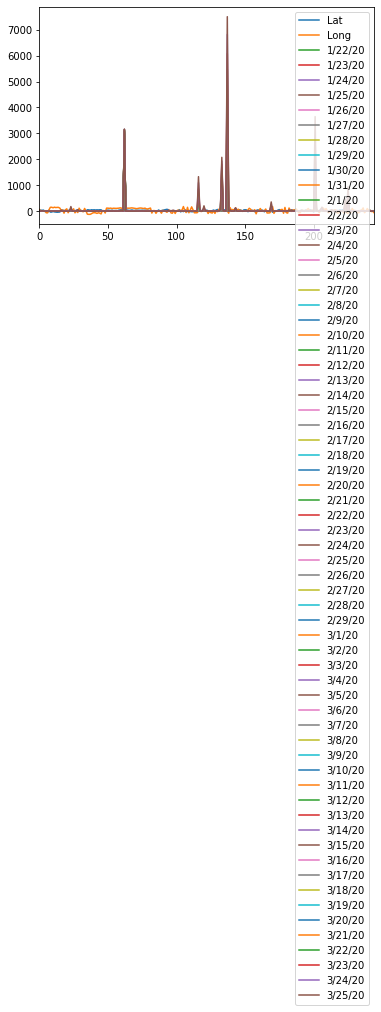

In [15]:
deaths.plot()

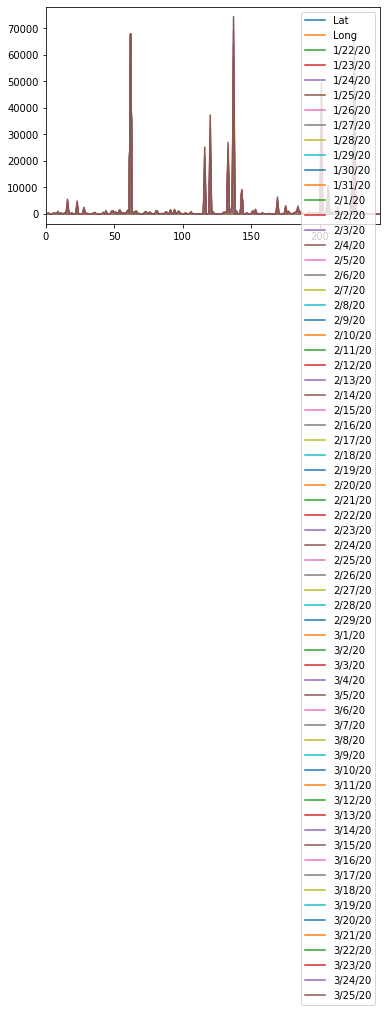

In [16]:
confirmed.plot()

## Cleaning and Formatting 

In [17]:
dates = confirmed.columns[4:]

confirmed_long = confirmed.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')

deaths_long = deaths.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Deaths')

full_table = pd.concat([confirmed_long, deaths_long['Deaths']], axis=1, sort=False)

full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0


In [0]:
full_table.to_csv("CovidDataCombined.csv", index = None, header = True)

In [19]:
! ls

'COVID-19 Global Data.ipynb'   time_series_covid19_confirmed_global.csv
 CovidDataCombined.csv	       time_series_covid19_deaths_global.csv
 CovidData.xlsx


In [20]:
data = pd.read_csv("CovidDataCombined.csv")
data.sample(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths
3775,NaN,Equatorial Guinea,1.5000,10.0000,2/6/20,0,0
13077,Faroe Islands,Denmark,61.8926,-6.9118,3/15/20,11,0
8590,Western Australia,Australia,-31.9505,115.8605,2/26/20,0,0
14410,NaN,South Africa,-30.5595,22.9375,3/20/20,202,0
2256,Chongqing,China,30.0572,107.8740,1/31/20,211,0
14955,Northern Territory,Australia,-12.4634,130.8456,3/23/20,5,0
10220,NaN,Norway,60.4720,8.4689,3/3/20,32,0
10061,NaN,Austria,47.5162,14.5501,3/3/20,21,0
12414,NaN,Namibia,-22.9576,18.4904,3/12/20,0,0
10346,Guizhou,China,26.8154,106.8748,3/4/20,146,2
